# Treefriend
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Illustrates how to use Tree friends:
  - create a simple TTree
  - Copy a subset of this TTree to a new TTree
  - Create a Tree Index
  - Make a friend TTree
  - compare two TTrees
  - Draw a variable from the first tree versus a variable
    in the friend Tree

You can run this tutorial with:
```
 root > .x treefriend.C  (interpreted via Cling)
 root > .x treefriend.C+ (executed via ACLIC & the native compiler)
```
or, variants like:
```
 root > .L treefriend.C+
 root > CreateParentTree();
 root > CreateFriendTree();
 root > CompareTrees();
 root > DrawFriend();
```




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Tuesday, January 17, 2017 at 02:44 PM.</small></i>

In [1]:
%%cpp -d
#include "TTree.h"
#include "TFile.h"
#include "TRandom.h"
#include "TTree.h"
#include "TTree.h"

Int_t Run, Event;
Float_t x,y,z;

 A helper function is created: 

In [2]:
%%cpp -d
void CreateParentTree() {
   // create a simple TTree with 5 branches
   // Two branches ("Run" and "Event") will be used to index the Tree
   TFile *f = new TFile("treeparent.root","recreate");
   TTree *T = new TTree("T","test friend trees");
   T->Branch("Run",&Run,"Run/I");
   T->Branch("Event",&Event,"Event/I");
   T->Branch("x",&x,"x/F");
   T->Branch("y",&y,"y/F");
   T->Branch("z",&z,"z/F");
   TRandom r;
   for (Int_t i=0;i<10000;i++) {
      if (i < 5000) Run = 1;
      else          Run = 2;
      Event = i;
      x = r.Gaus(10,1);
      y = r.Gaus(20,2);
      z = r.Landau(2,1);
      T->Fill();
   }
   T->Print();
   T->Write();
   delete f;
}

 A helper function is created: 

In [3]:
%%cpp -d
void CreateFriendTree() {
   // Open the file created by CreateParentTree
   // Copy a subset of the TTree into a new TTree
   //   (see also tutorials copytree.C, copytree2.C and copytree3.C)
   // Create an index on the new TTree ("Run","Event")
   // Write the new TTree (including its index)

   TFile *f = new TFile("treeparent.root");
   TTree *T = (TTree*)f->Get("T");
   TFile *ff = new TFile("treefriend.root","recreate");
   TTree *TF = T->CopyTree("z<10");
   TF->SetName("TF");
   TF->BuildIndex("Run","Event");
   TF->Write();
   TF->Print();
   delete ff;
}

 A helper function is created: 

In [4]:
%%cpp -d
void CompareTrees() {
   // The two TTrees created above are compared.
   // The subset of entries in the small TTree must be identical
   // to the entries in the original TTree.

   TFile *f = new TFile("treeparent.root");
   TTree *T  = (TTree*)f->Get("T");
   TFile *ff = new TFile("treefriend.root");
   TTree *TF = (TTree*)ff->Get("TF");
   Int_t fRun,fEvent;
   Float_t fx,fy,fz;
   T->SetBranchAddress("Run",&Run);
   T->SetBranchAddress("Event",&Event);
   T->SetBranchAddress("x",&x);
   T->SetBranchAddress("y",&y);
   T->SetBranchAddress("z",&z);
   TF->SetBranchAddress("Run",&fRun);
   TF->SetBranchAddress("Event",&fEvent);
   TF->SetBranchAddress("x",&fx);
   TF->SetBranchAddress("y",&fy);
   TF->SetBranchAddress("z",&fz);
   T->AddFriend(TF);

   Long64_t nentries = T->GetEntries();
   Int_t nok = 0;
   for (Long64_t i=0;i<nentries;i++) {
      T->GetEntry(i);
      if (fRun == Run && fEvent==Event && x==fx && y==fy &&z==fz) {
         nok++;
      } else {
         if (TF->GetEntryWithIndex(Run,Event) > 0) {
            if (i <100) printf("i=%lld, Run=%d, Event=%d, x=%g, y=%g, z=%g,  : fRun=%d, fEvent=%d, fx=%g, fy=%g, fz=%g\n",i,Run,Event,x,y,z,fRun,fEvent,fx,fy,fz);
         }
      }
   }
   printf("nok = %d, fentries=%lld\n",nok,TF->GetEntries());

   delete f;
   delete ff;
}

 A helper function is created: 

In [5]:
%%cpp -d
void DrawFriend() {
  // Draw a scatter plot of variable x in the parent TTree versus
  // the same variable in the subtree.
  // This should produce points along a straight line.

   TFile *f  = TFile::Open("treeparent.root");
   TTree *T  = (TTree*)f->Get("T");
   T->AddFriend("TF","treefriend.root");
   T->Draw("x:TF.x");
}

In [6]:
CreateParentTree();
CreateFriendTree();
CompareTrees();
DrawFriend();

******************************************************************************
*Tree    :T         : test friend trees                                      *
*Entries :    10000 : Total =          203696 bytes  File  Size =      94821 *
*        :          : Tree compression factor =   1.69                       *
******************************************************************************
*Br    0 :Run       : Run/I                                                  *
*Entries :    10000 : Total  Size=      40687 bytes  File Size  =        265 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression= 120.75     *
*............................................................................*
*Br    1 :Event     : Event/I                                                *
*Entries :    10000 : Total  Size=      40701 bytes  File Size  =      11231 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.85     *
*...................................................

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

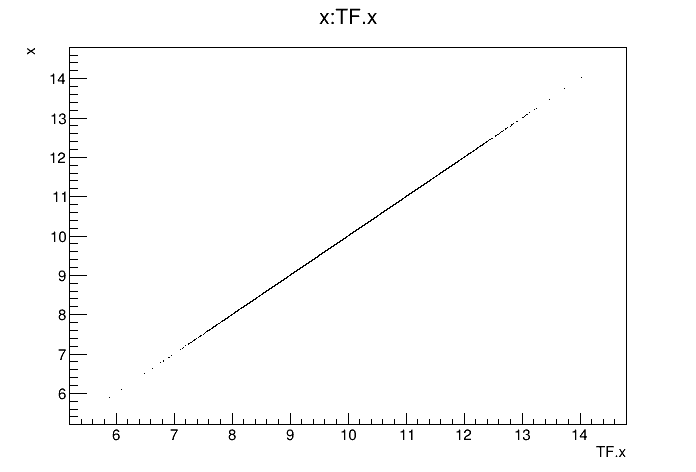

In [7]:
gROOT->GetListOfCanvases()->Draw()